In [1]:
from autometric.criteria import plot_indicatrices,  indicatrix_volume_variance_metric, frequency_of_volume_variance


INFO: Using numpy backend
INFO: Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO: NumExpr defaulting to 8 threads.


In [2]:
# instantiate a pytorch lightning trainer and train DerrickTheAutoencoder on the sphere dataset
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping
import torch
from autometric.autoencoders import DerrickTheAutoencoder
import os
from autometric.datasets import PointcloudDataset

from diffusion_curvature.datasets import sphere, torus

In [3]:
early_stopping = EarlyStopping('val_loss', patience=500)
trainer = Trainer(max_epochs=1000, 
                #   accelerator='cuda',
                  callbacks=[early_stopping])
model = DerrickTheAutoencoder(input_dim=3, intrinsic_dimension=2)
# check if model alreaady exists at ../data/sphere_encoder.pt - if so, load it
if os.path.exists('../data/sphere_encoder.pt'):
    model.load_state_dict(torch.load('../data/sphere_encoder.pt'))
else:
    trainer.fit(
        model=model,
        train_dataloaders=trainloader,
        val_dataloaders=valloader
    )

INFO: Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
/home/piriac/mambaforge/envs/autometric/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard supp

In [4]:
X_sphere, ks_sphere = sphere(n=10000)
train_dataset = PointcloudDataset(X_sphere)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

/home/piriac/mambaforge/envs/autometric/lib/python3.11/site-packages/torch/_functorch/deprecated.py:88: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.jacfwd is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.jacfwd instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('jacfwd')
/home/piriac/mambaforge/envs/autometric/lib/python3.11/site-packages/torch/_functorch/deprecated.py:61: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.vmap is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.vmap instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecat

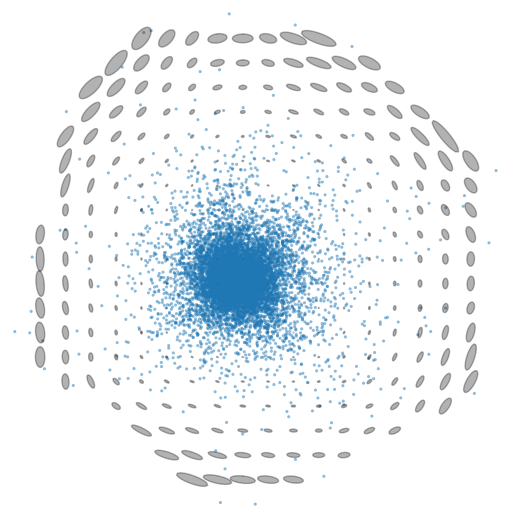

In [5]:
iv_metric = indicatrix_volume_variance_metric(model, trainloader)
fv_metric = frequency_of_volume_variance(model, trainloader)
plot_indicatrices(model, trainloader, scaling_factor=1/400) # you'll need to play with the scaling factor